# Load Testing Analysis

## Jonathan Camenzuli

Source code is part of my Final Year Project in Computer Engineering (2022/23) entitled "Miniature implementation of an IoT-based Smart City"

In [1]:
# Libaries
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['font.family'] = 'Lato'
mpl.rcParams['font.sans-serif'] = 'Lato'
# mpl.rcParams['figure.figsize'] = (6.4,4.8)

In [3]:
def get_merged_data(resource_df, label_df):
    
    # Convert the timestamps to datetime objects
    resource_df_copy = resource_df.copy()
    label_df_copy = label_df.copy()

    resource_df_copy['Timestamp'] = pd.to_datetime(resource_df_copy['Timestamp'], format='%Y-%m-%d %H:%M:%S').dt.time
    label_df_copy['Timestamp'] = pd.to_datetime(label_df_copy['Timestamp'], format='%Y-%m-%d %H:%M:%S').dt.time

    # Merge the dataframes based on the timestamp columns
    merged_data = pd.merge(resource_df_copy, label_df_copy, left_on='Timestamp', right_on='Timestamp', how='left')
    return merged_data

In [4]:
def plot_data(data):
    t = np.arange(len(data['Timestamp']))

    plt.plot(t, data['CPU (%)'])
    plt.plot(t, data['Memory (%)'])
    plt.plot(t, data['Disk (%)'])
    # plt.plot(t, data['Temperature (C)'])

    plt.xlabel('Timestamp')
    plt.ylabel('Utilization / Temperature')
    plt.title('System Resource Utilization and Temperature')
    plt.legend(['CPU Utilisation (%)', 'Memory Utilisation (%)', 'Disk Utilisation (%)'])
    plt.grid(True)

    # Display the plot
    plt.show()

In [5]:
def plot_data_markers(data):
    t = np.arange(len(data['Timestamp']))

    plt.plot(t, data['CPU (%)'])
    plt.plot(t, data['Memory (%)'])
    plt.plot(t, data['Disk (%)'])
    # plt.plot(t, data['Temperature (C)'])

    plt.xlabel('Timestamp')
    plt.ylabel('Utilization / Temperature')
    plt.title('System Resource Utilization and Temperature')
    plt.legend(['CPU Utilisation (%)', 'Memory Utilisation (%)', 'Disk Utilisation (%)'])
    plt.grid(True)

    for index, row in data.iterrows():
        if not pd.isna(row['Label']):
            if "CoAP Payload Received from" in row['Label']:
                plt.axvline(x=index, color='red', linestyle='--')
            else:
                if "192.168.1.254" in row['Label']:
                    plt.axvline(x=index, color='blue', linestyle='--')
                else:
                    plt.axvline(x=index, color='orange', linestyle='--')

    plt.show()

In [6]:
resource_df = pd.read_csv('./resource_data.csv')
label_df = pd.read_csv('./timestamps.csv')

In [7]:
merged_data = get_merged_data(resource_df, label_df)
print(merged_data)

    Timestamp  CPU (%)  Memory (%)  Disk (%)  Temperature (C) Label
0    17:50:11     25.2         6.3      24.1           55.504   NaN
1    17:50:13     26.2         6.3      24.1           55.504   NaN
2    17:50:15     25.0         6.3      24.1           55.991   NaN
3    17:50:17     25.0         6.3      24.1           55.504   NaN
4    17:50:19     25.2         6.3      24.1           55.504   NaN
..        ...      ...         ...       ...              ...   ...
450  18:05:03     25.2         6.4      24.1           56.478   NaN
451  18:05:05     25.0         6.4      24.1           56.965   NaN
452  18:05:07     25.0         6.4      24.1           55.504   NaN
453  18:05:09     25.0         6.4      24.1           55.017   NaN
454  18:05:11     25.0         6.4      24.1           55.017   NaN

[455 rows x 6 columns]


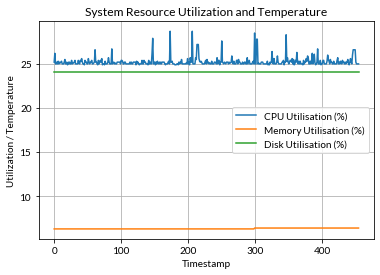

In [8]:
plot_data(merged_data)

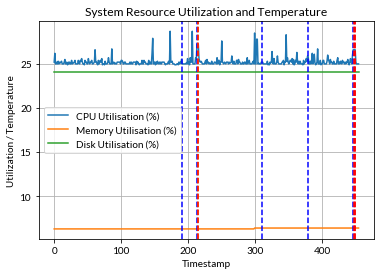

In [9]:
plot_data_markers(merged_data)